In [43]:
#This Code imports pandas, the data frame from the URl, and shows the first 5 lines of the imported data.

import pandas as pd

df = pd.read_csv('s3://ia-340-375976432/Border_Crossing_Entry_Data.csv')

df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Jackman,Maine,104,US-Canada Border,Jan 2024,Trucks,6556,45.806,-70.397,POINT (-70.396722 45.805661)
1,Porthill,Idaho,3308,US-Canada Border,Apr 2024,Trucks,98,49.000,-116.499,POINT (-116.49925 48.999861)
2,San Luis,Arizona,2608,US-Mexico Border,Apr 2024,Buses,10,32.485,-114.782,POINT (-114.7822222 32.485)
3,Willow Creek,Montana,3325,US-Canada Border,Jan 2024,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972)
4,Warroad,Minnesota,3423,US-Canada Border,Jan 2024,Personal Vehicle Passengers,9266,48.999,-95.377,POINT (-95.376555 48.999)


In [44]:
df.drop(['Latitude', 'Longitude', 'Point'], axis=1, inplace=True)
df.dropna(inplace=True)
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Jackman,Maine,104,US-Canada Border,Jan 2024,Trucks,6556
1,Porthill,Idaho,3308,US-Canada Border,Apr 2024,Trucks,98
2,San Luis,Arizona,2608,US-Mexico Border,Apr 2024,Buses,10
3,Willow Creek,Montana,3325,US-Canada Border,Jan 2024,Pedestrians,2
4,Warroad,Minnesota,3423,US-Canada Border,Jan 2024,Personal Vehicle Passengers,9266


This Graph represents the number of legal border crossings occuring at the US-Canada Border and US-Mexico Border.
Some notable takeaways includes a steady decrease of border crossings between 2000 and 2012 as well as a sharp decrease
in 2020 which represents the Covid Pandemic. Since then, the border crossings has stabalized and continues to trend downwards

To do this, I changed the date time, isolated the the data into two groups based on the border,
and then graphed the sum of border crossings by date which is represented in both lines on the graph.

/tmp/ipykernel_7611/1204265550.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


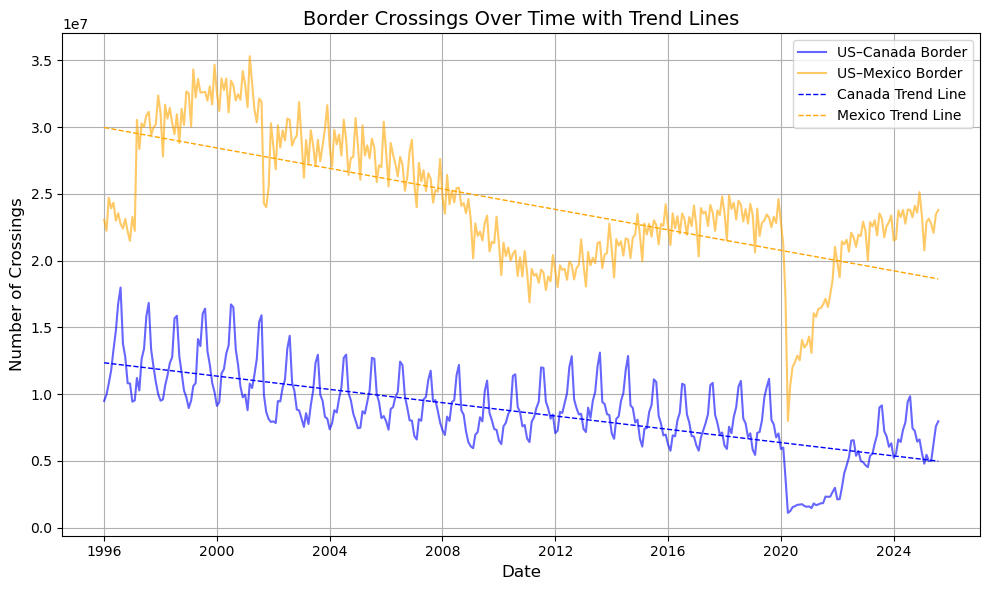

In [45]:
import matplotlib.pyplot as plt
import numpy as np

df['Date'] = pd.to_datetime(df['Date'])

canada = df[df['Border'] == 'US-Canada Border']
mexico = df[df['Border'] == 'US-Mexico Border']

canada_grouped = canada.groupby('Date')['Value'].sum().reset_index()
mexico_grouped = mexico.groupby('Date')['Value'].sum().reset_index()

canada_grouped['Date_num'] = canada_grouped['Date'].map(pd.Timestamp.toordinal)
mexico_grouped['Date_num'] = mexico_grouped['Date'].map(pd.Timestamp.toordinal)

canada_fit = np.polyfit(canada_grouped['Date_num'], canada_grouped['Value'], 1)
mexico_fit = np.polyfit(mexico_grouped['Date_num'], mexico_grouped['Value'], 1)

canada_trend = np.polyval(canada_fit, canada_grouped['Date_num'])
mexico_trend = np.polyval(mexico_fit, mexico_grouped['Date_num'])

plt.figure(figsize=(10,6))
plt.plot(canada_grouped['Date'], canada_grouped['Value'], label='US–Canada Border', color='blue', alpha=0.6)
plt.plot(mexico_grouped['Date'], mexico_grouped['Value'], label='US–Mexico Border', color='orange', alpha=0.6)

plt.plot(canada_grouped['Date'], canada_trend, '--', color='blue', linewidth=1, label='Canada Trend Line')
plt.plot(mexico_grouped['Date'], mexico_trend, '--', color='orange', linewidth=1, label='Mexico Trend Line')

plt.title('Border Crossings Over Time with Trend Lines', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Crossings', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show chart
plt.show()